In [ ]:
!git clone https://github.com/facebookresearch/detectron2.git detectron2_repo
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'
!python -m pip install 'git+https://github.com/cocodataset/panopticapi.git'
!pip install open3d #you need to restart the runtime after this cell
!pip install ipython-autotime
%load_ext autotime

In [ ]:
import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

In [ ]:
from google.colab.patches import cv2_imshow
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer, ColorMode
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.projects import panoptic_deeplab
import cv2
import open3d as o3d
import pandas as pd
import math as m
from math import pi
import numpy as np

In [ ]:
cfg = get_cfg()
panoptic_deeplab.add_panoptic_deeplab_config(cfg)
cfg.merge_from_file("detectron2_repo/projects/Panoptic-DeepLab/configs/Cityscapes-PanopticSegmentation/panoptic_deeplab_R_52_os16_mg124_poly_90k_bs32_crop_512_1024_dsconv.yaml")
cfg.MODEL.WEIGHTS = "detectron2://PanopticDeepLab/Cityscapes-PanopticSegmentation/panoptic_deeplab_R_52_os16_mg124_poly_90k_bs32_crop_512_1024_dsconv/model_final_23d03a.pkl"
predictor = DefaultPredictor(cfg)

In [ ]:
semantic_segmentation = dict()
for i in range(60,86):
  image_name = f"pano_000006_0000{i}.jpg"
  path = "/content/drive/MyDrive/project-data/cropped-images/" + image_name
  im = cv2.imread(path)
  sem_seg = predictor(im)["sem_seg"].argmax(dim=0).to("cpu")
  semantic_segmentation[image_name] = sem_seg

In [ ]:
im = cv2.imread("/content/drive/MyDrive/project-data/cropped-images/pano_000006_000060.jpg")

In [ ]:
outputs = predictor(im)

In [ ]:
classes = MetadataCatalog.get(cfg.DATASETS.TRAIN[0]).stuff_classes

In [ ]:
classes

['road',
 'sidewalk',
 'building',
 'wall',
 'fence',
 'pole',
 'traffic light',
 'traffic sign',
 'vegetation',
 'terrain',
 'sky',
 'person',
 'rider',
 'car',
 'truck',
 'bus',
 'train',
 'motorcycle',
 'bicycle']

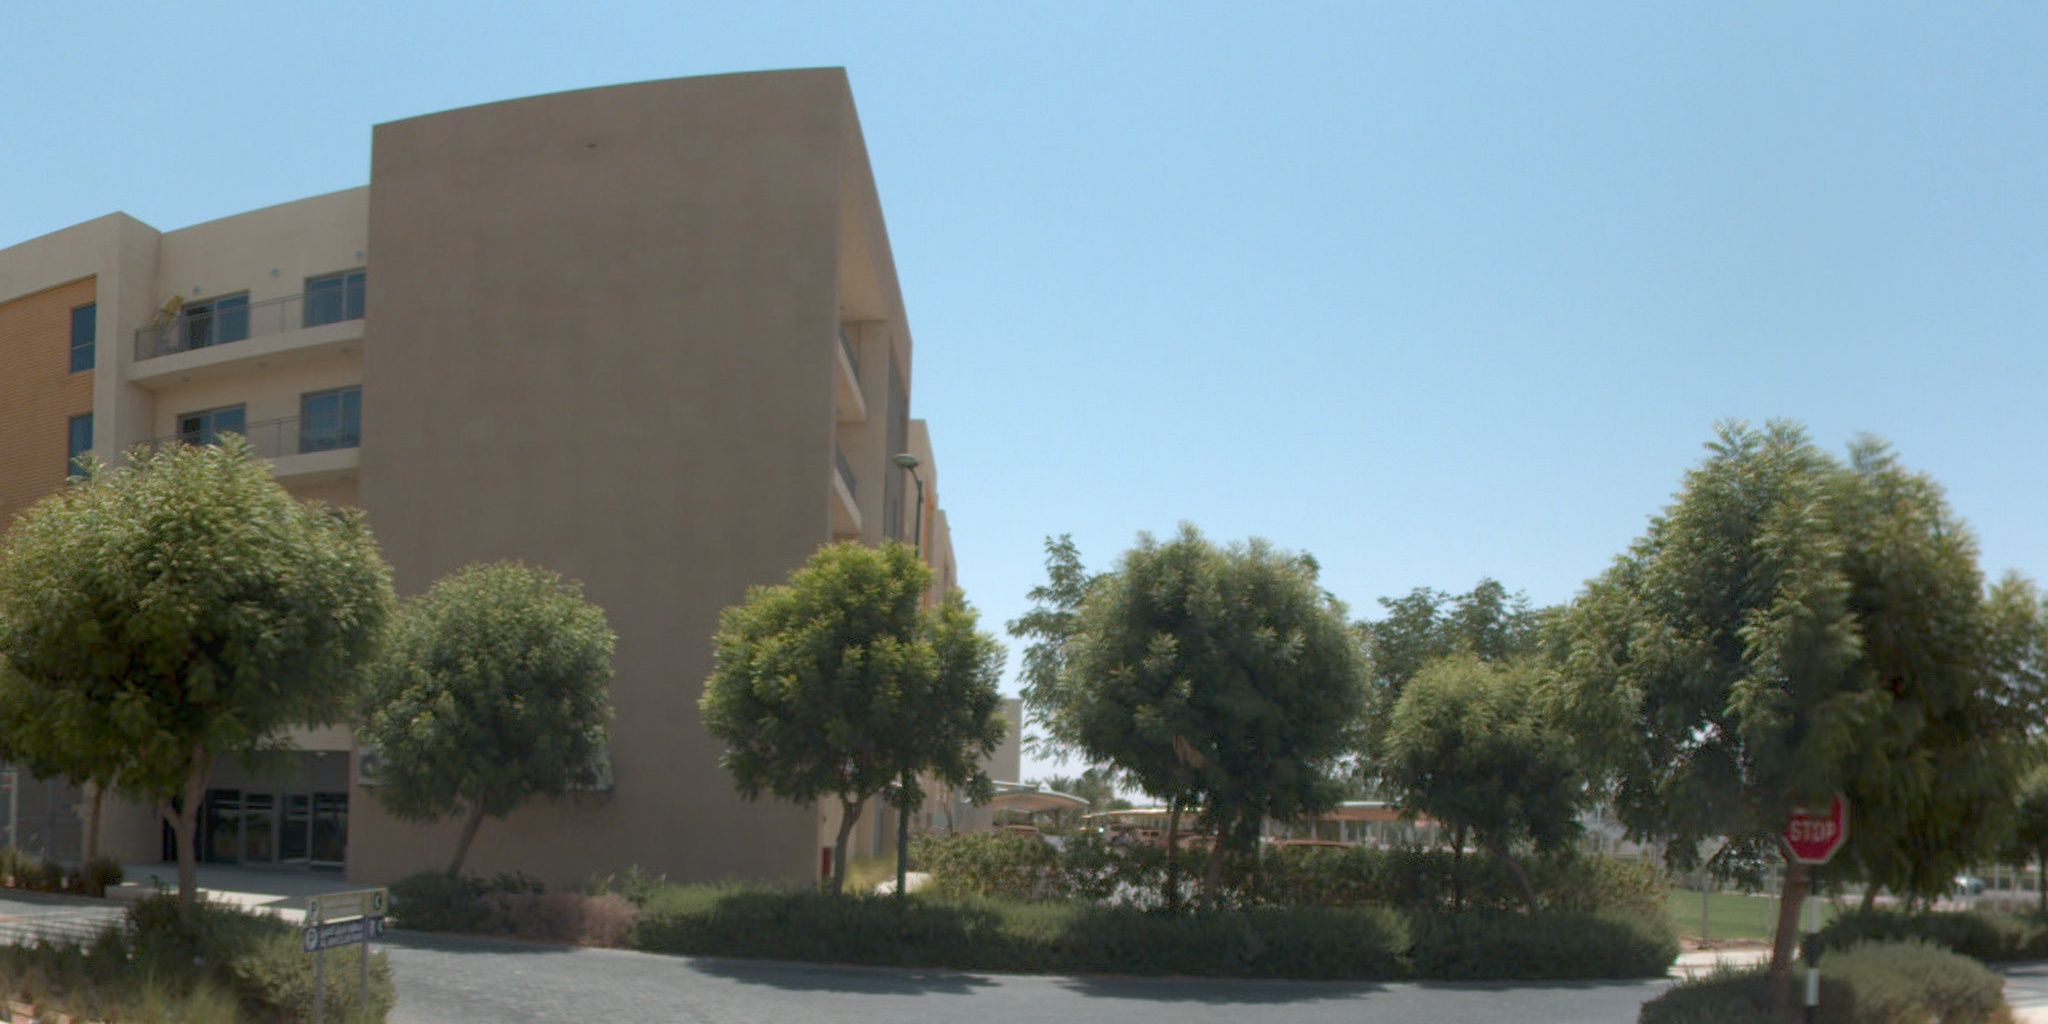

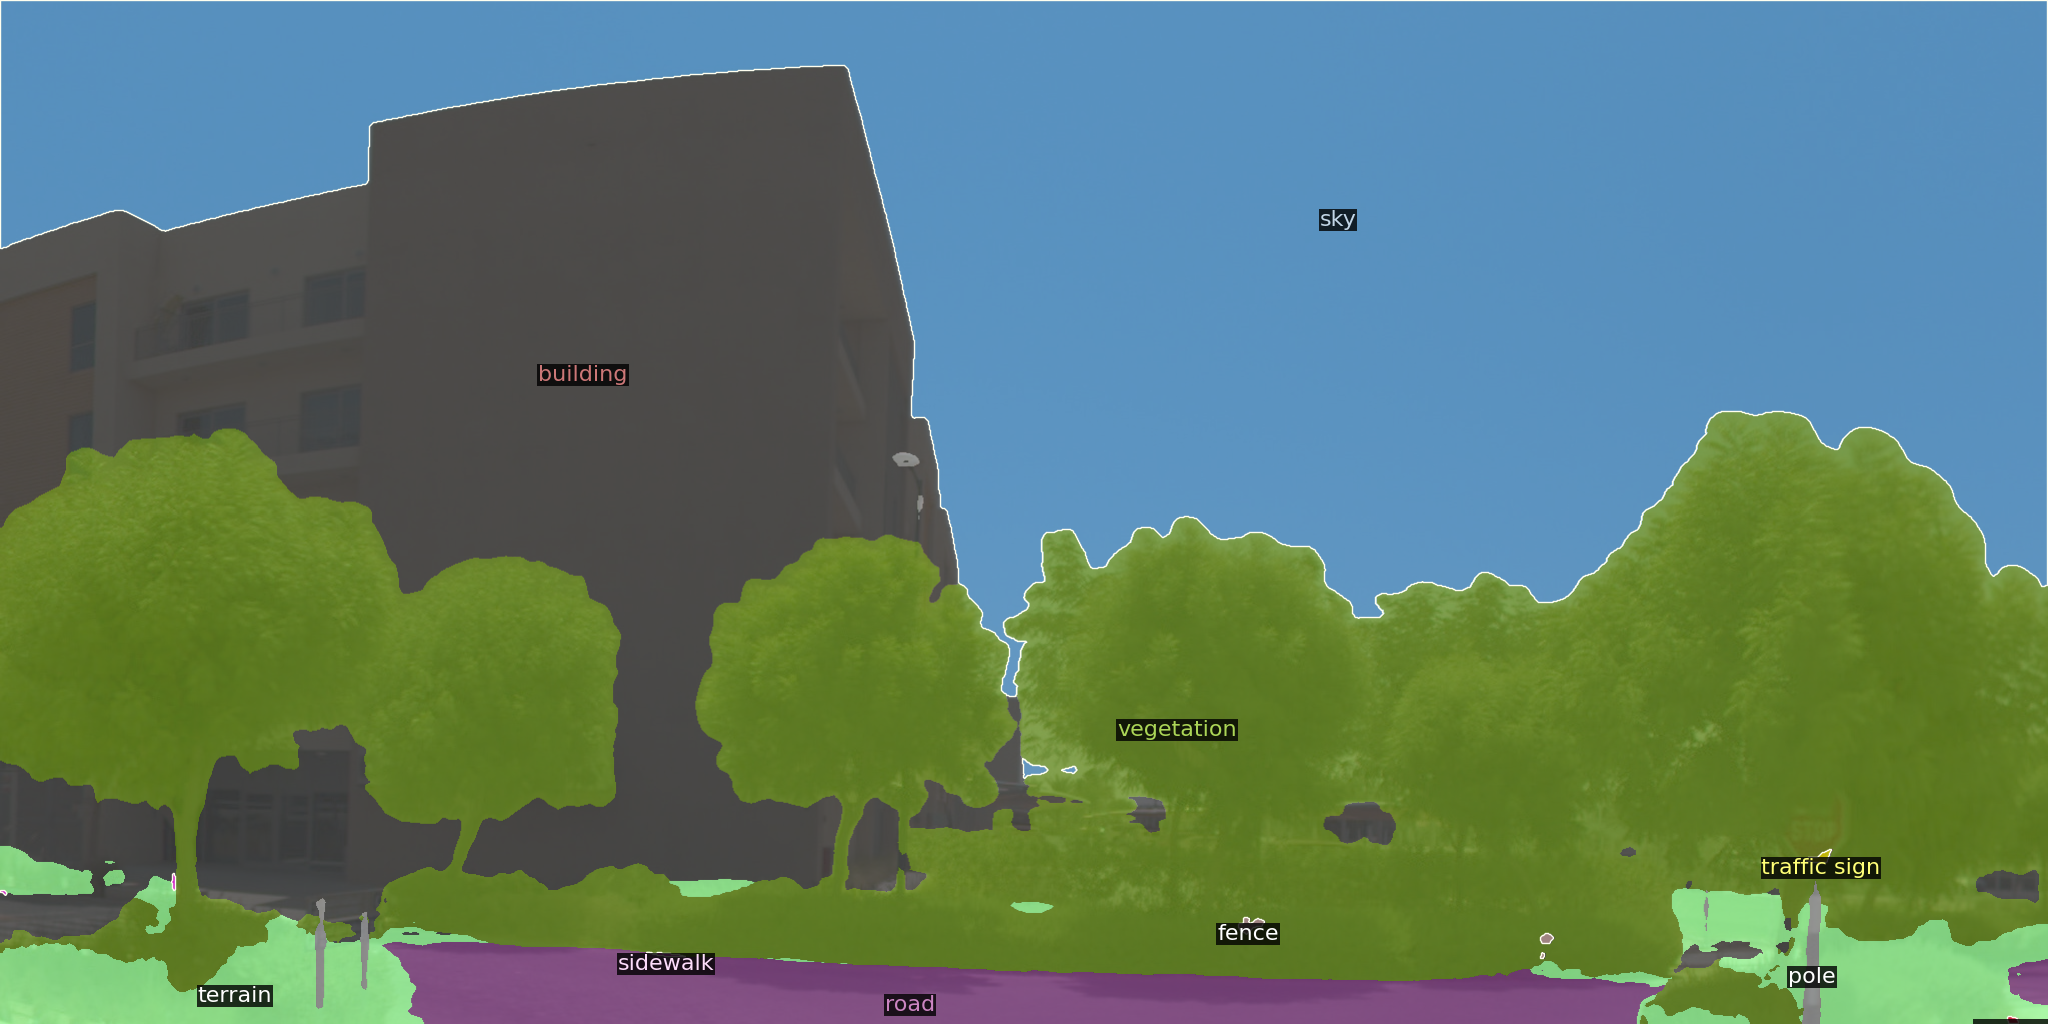

In [ ]:
cv2_imshow(im)
outputs = predictor(im)
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), instance_mode=ColorMode.SEGMENTATION)
x = outputs["sem_seg"].argmax(dim=0)
out = v.draw_sem_seg(x.to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])